In [50]:
! pip install transformers
! pip install nltk
from transformers import pipeline
from nltk import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Model Loading**

In [ ]:
import torch
model_name = "facebook/bart-large-mnli"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
def load_model(device):
  theme_classifier = pipeline("zero-shot-classification", model=model_name, device=device)
  return theme_classifier

In [ ]:
theme_classifier = load_model(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


In [ ]:
theme_list= ["friendship","hope","battle","self development","betrayal","love","dialogue"]

In [ ]:
from glob import glob

In [ ]:
!unzip /content/[Subtitlist] naruto-season-1-english-2206507.zip

unzip:  cannot find or open /content/[Subtitlist], /content/[Subtitlist].zip or /content/[Subtitlist].ZIP.

No zipfiles found.


In [ ]:
!unzip /content/subtitles/naruto.zip

Archive:  /content/subtitles/naruto.zip
subtitlist.com
  inflating: Naruto Season 1 - 01.ass  
  inflating: Naruto Season 1 - 02.ass  
  inflating: Naruto Season 1 - 03.ass  
  inflating: Naruto Season 1 - 04.ass  
  inflating: Naruto Season 1 - 05.ass  
  inflating: Naruto Season 1 - 06.ass  
  inflating: Naruto Season 1 - 07.ass  
  inflating: Naruto Season 1 - 08.ass  
  inflating: Naruto Season 1 - 09.ass  
  inflating: Naruto Season 1 - 10.srt  
  inflating: Naruto Season 1 - 11.srt  
  inflating: Naruto Season 1 - 12.ass  
  inflating: Naruto Season 1 - 13.ass  
  inflating: Naruto Season 1 - 14.ass  
  inflating: Naruto Season 1 - 15.ass  
  inflating: Naruto Season 1 - 16.ass  
  inflating: Naruto Season 1 - 17.ass  
  inflating: Naruto Season 1 - 18.ass  
  inflating: Naruto Season 1 - 19.ass  
  inflating: Naruto Season 1 - 20.ass  
  inflating: Naruto Season 1 - 21.ass  
  inflating: Naruto Season 1 - 22.ass  
  inflating: Naruto Season 1 - 23.ass  
  inflating: Naruto Seaso

In [ ]:
files = glob("/content/*.ass")

In [ ]:
files[:4]

['/content/Naruto Season 3 - 66.ass',
 '/content/Naruto Season 3 - 76.ass',
 '/content/Naruto Season 3 - 71.ass',
 '/content/Naruto Season 1 - 17.ass']

In [ ]:
import pandas as pd

In [ ]:
## A function to load the data from the subtitles files and combine them into one dictionary {episode:script of the episode} at that fromat

def load_subs(data_path):
  subs=glob(data_path+'/*.ass')
  scripts = []
  episodes=[]

  for path in subs:

    with open(path,'r') as file:
      lines = file.readlines()
      lines = lines[27:] # As in every file the first 27 line is not needed
      lines = [",".join(line.split(',')[9:]) for line in lines] # cutting everything before the 9th comma
    lines = [line.replace('\\N'," ") for line in lines]
    script = " ".join(lines) # Combining the scripts of the episode into one script
    scripts.append(script)
    episode = int(path.split('-')[-1].split('.')[0].strip())
    episodes.append(episode)

  df = pd.DataFrame.from_dict({'episode':episodes,'script':scripts})
  return df



In [ ]:
sub_path = "/content"

In [ ]:
df = load_subs(sub_path)

In [ ]:
df=df.sort_values(by='episode')

In [ ]:
df.head()

,episode,script
99,1,"A long time ago, a powerful demon fox appeared..."
190,2,"C'mon!\n Running like a fugitive,\n Being chas..."
157,3,"C'mon!\n Running like a fugitive,\n Being chas..."
59,4,"C'mon!\n Running like a fugitive,\n Being chas..."
88,5,"C'mon!\n Running like a fugitive,\n Being chas..."


In [ ]:
script = df.iloc[0]['script']


In [ ]:
script_sentences = sent_tokenize(script)

In [33]:
script_sentences[:5]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!"]

In [34]:
# Dividing the script into batches to fit the model

batch_size = 20
script_batches = []

for index in range(0,len(script_sentences),batch_size):
    sent = "".join(script_sentences[index:index+batch_size])
    script_batches.append(sent)





In [35]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails.With its powerful tails,\n it could smash mountains and create tidal waves.A band of Ninjas rose to defend their village from attack.We have to wait until the Fourth Hokage gets here!We can't let it get any closer to our village!One great Ninja was able to imprison the monster,\n but died in the process.This Ninja was known as… the Fourth Hokage.Naruto!Why did you do such a thing?!You're really gonna get it this time!I don't care!You know your problem?You can't do the things I do!Only I can do this!I'm better than all of you!Believe it!There's a problem, sir!Lord Hokage!What is it?Did that Naruto do something again?",
 'Yes.He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!Wait!Ha ha…\n Why should I?Hey, Naruto!How did you suddenly get here, lruka Sensei?The question is what are you doing here when you should be in class now?Now listen, Naruto.You failed the last graduation test and

In [38]:
theme_output = theme_classifier(script_batches,theme_list,multi_label=True)

In [39]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails.With its powerful tails,\n it could smash mountains and create tidal waves.A band of Ninjas rose to defend their village from attack.We have to wait until the Fourth Hokage gets here!We can't let it get any closer to our village!One great Ninja was able to imprison the monster,\n but died in the process.This Ninja was known as… the Fourth Hokage.Naruto!Why did you do such a thing?!You're really gonna get it this time!I don't care!You know your problem?You can't do the things I do!Only I can do this!I'm better than all of you!Believe it!There's a problem, sir!Lord Hokage!What is it?Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9804248809814453,
   0.9247324466705322,
   0.8402332663536072,
   0.6571637988090515,
   0.21128977835178375,
   0.06900562345981598,
   0.05135882645845413]},
 {'s

In [40]:
import numpy as np

In [43]:
 # A function to combine these steps and wrangle the output
def theme_inference(script):
  script_sentences = sent_tokenize(script)

  batch_size = 20
  script_batches = []

  for index in range(0,len(script_sentences),batch_size):
      sent = "".join(script_sentences[index:index+batch_size])
      script_batches.append(sent)
  theme_output = theme_classifier(script_batches[:2],theme_list,multi_label=True)

  themes={}
  for output in theme_output:
      for label,score in zip(output['labels'],output['scores']):
          if label not in themes:
            themes[label] = []
          themes[label].append(score)
  themes = {key:np.mean(np.array(value)) for key,value in themes.items()}

  return themes




In [44]:
output_themes = df['script'].apply(theme_inference)

In [45]:
theme_df = pd.DataFrame(output_themes.tolist())

In [46]:
theme_df

,dialogue,betrayal,battle,self development,hope,friendship,love
0,0.845704,0.606553,0.720643,0.666867,0.216121,0.064651,0.045963
1,0.907301,0.374435,0.470770,0.362766,0.080365,0.028458,0.052005
2,0.915208,0.234547,0.654941,0.703551,0.684056,0.345756,0.272207
3,0.666215,0.412515,0.722339,0.857345,0.445840,0.349568,0.248070
4,0.878037,0.838154,0.778704,0.522457,0.052996,0.047666,0.036943
...,...,...,...,...,...,...,...
213,0.859023,0.684090,0.363615,0.516393,0.079876,0.330355,0.164152
214,0.921766,0.190871,0.688227,0.497985,0.324644,0.525970,0.277901
215,0.917125,0.329744,0.874463,0.524278,0.210907,0.296209,0.252613
216,0.835533,0.276571,0.583343,0.505285,0.219696,0.481956,0.203351


In [47]:
df[theme_df.columns] = theme_df

In [48]:
df = df.drop('dialogue',axis=1)


In [49]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,betrayal,104.748362
1,battle,147.419742
2,self development,142.716866
3,hope,81.323885
4,friendship,65.970773
5,love,46.057381


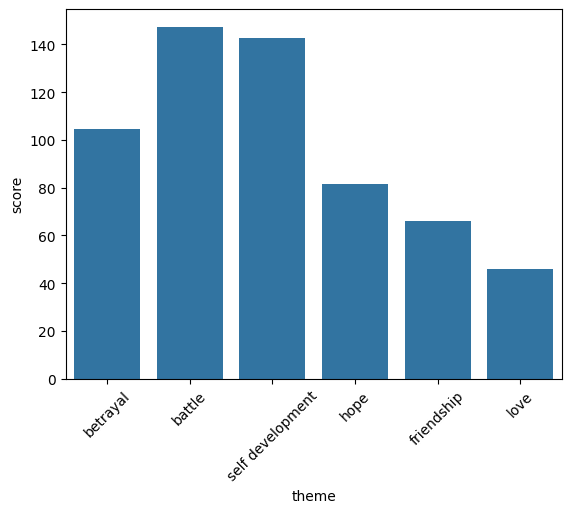

In [51]:
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()